In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [50]:
import pandas as pd

# Provide the file path to the dataset
file_path = r"C:\Users\RUPESH SINGH\OneDrive\Documents\Backup\OneDrive\Desktop\jupiter\wine.data"

# Define meaningful column names
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Read the CSV file into a DataFrame with meaningful column names
wine_df = pd.read_csv(file_path, header=None, names=column_names)

df=pd.DataFrame(wine_df)
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [51]:
X=df.iloc[ : ,1:]
y=df.iloc[ :,0]

In [52]:
# Check for missing values
missing_values = wine_df.isnull().sum()
print(missing_values)

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


In [64]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [65]:
pca=PCA(n_components=4)

In [66]:
X_train=pca.fit_transform(X_train)

In [67]:
pca.components_

array([[ 1.72074425e-03, -8.50644281e-04,  1.82570607e-04,
        -5.29784493e-03,  1.86625638e-02,  1.02586076e-03,
         1.55769534e-03, -1.14638481e-04,  6.55889190e-04,
         2.25911501e-03,  1.52818079e-04,  7.72160310e-04,
         9.99805120e-01],
       [-1.37237666e-03, -3.13087369e-03,  3.68856710e-03,
         2.19770571e-02,  9.99484772e-01,  2.00762680e-03,
         1.41813551e-03, -1.50197447e-03,  6.20568120e-03,
         1.13254423e-02, -1.39626837e-04, -1.34787142e-03,
        -1.85741465e-02],
       [-2.28265234e-03,  1.04772941e-01,  5.46261443e-02,
         9.71960017e-01, -2.28497110e-02, -3.39326417e-02,
        -6.42169651e-02,  1.41987410e-02, -3.20079113e-02,
         1.77870301e-01, -1.99836995e-02, -4.72939383e-02,
         5.45507486e-03],
       [ 1.35516103e-01,  2.17038732e-01, -4.42483229e-03,
        -2.15937258e-01, -3.76088010e-03, -1.00809715e-01,
        -2.02913178e-01,  1.52247844e-02, -7.31504375e-02,
         8.84147658e-01, -6.84265262e

In [68]:
pca.explained_variance_ratio_

array([9.97780478e-01, 2.03751274e-03, 1.01462651e-04, 5.25574114e-05])

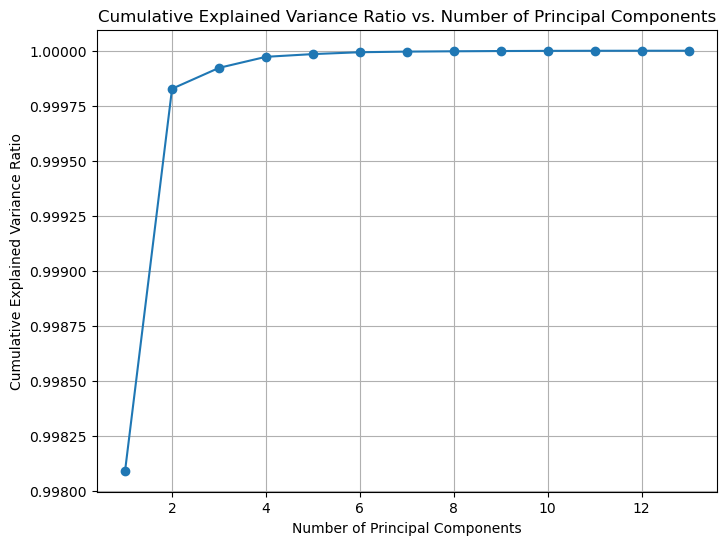

In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA to the preprocessed dataset
pca.fit(X)

# Get the cumulative explained variance ratio
cumulative_explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()


In [80]:
from sklearn.cluster import KMeans

# Initialize K-Means with the desired number of clusters
num_clusters = 3  # You can choose the number of clusters based on your problem
kmeans = KMeans(n_clusters=num_clusters)

# Fit K-Means to the PCA-transformed data
kmeans.fit(X)

# Obtain cluster labels for each data point
cluster_labels = kmeans.labels_
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

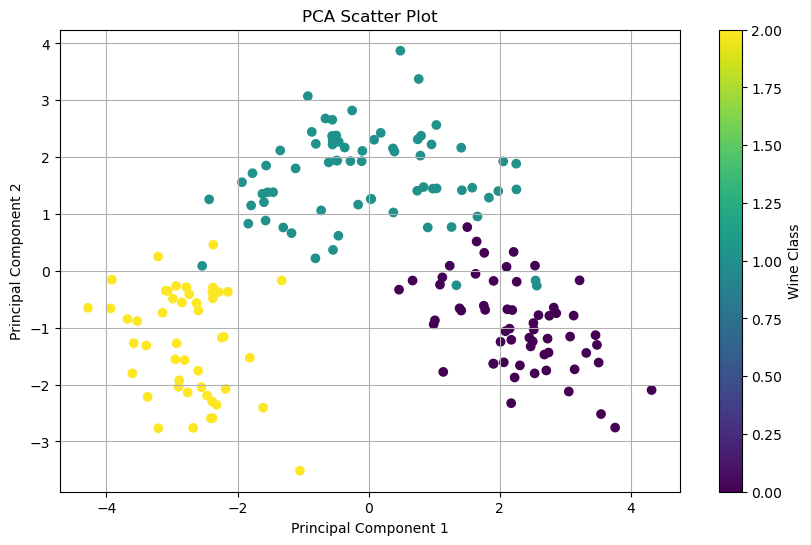

Silhouette Score: 0.28485891918989886


In [81]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Download the wine dataset from the UCI Machine Learning Repository
# Load the dataset
wine_data = load_wine()

# Step 2: Load the dataset into a Pandas dataframe
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Step 3: Split the dataset into features and target variables
X = wine_df
y = wine_data.target

# Step 4: Perform data preprocessing
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Implement PCA on the preprocessed dataset
# Initialize PCA
pca = PCA()

# Fit PCA to the scaled data
X_pca = pca.fit_transform(X_scaled)

# Step 6: Determine the optimal number of principal components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Determine the number of components to retain based on explained variance
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Step 7: Visualize the results of PCA using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Wine Class')
plt.grid(True)
plt.show()

# Step 8: Perform clustering on the PCA-transformed data using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Step 9: Interpret the results of PCA and clustering analysis
# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print("Silhouette Score:", silhouette_avg)
